In [1]:
# !python -m pip install konlpy

     |████████████████████████████████| 19.4 MB 4.8 MB/s 
     |████████████████████████████████| 86 kB 5.4 MB/s 
     |████████████████████████████████| 448 kB 52.6 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [2]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0  55043      0 --:--:-- --:--:-- --:--:-- 54451


In [3]:
# !bash ./mecab.sh

Installing automake (A dependency for mecab-ko)
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [62.9 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease

In [4]:
!curl -O https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19.6M  100 19.6M    0     0  53.3M      0 --:--:-- --:--:-- --:--:-- 53.3M


In [5]:
import pandas as pd
total_data = pd.read_table('./naver_shopping.txt', names=['ratings', 'reviews'])
total_data.head(10)

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
5,2,비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...
6,1,주문을 11월6에 시켰는데 11월16일에 배송이 왔네요 ㅎㅎㅎ 여기 회사측과는 전화...
7,2,넉넉한 길이로 주문했는데도 안 맞네요 별로예요
8,2,보폴이 계속 때처럼 나오다가 지금은 안나네요~
9,2,110인데 전문속옷브랜드 위생팬티105보다 작은듯해요. 불편해요. 밴딩부분이 다 신...


In [6]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   ratings  200000 non-null  int64 
 1   reviews  200000 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


In [7]:
total_data.drop_duplicates(subset=['reviews'], inplace=True)
len(total_data)

199908

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_data = total_data['reviews']
y_data = total_data['ratings']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((149931,), (149931,), (49977,), (49977,))

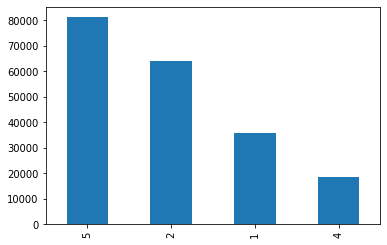

In [11]:
y_data.value_counts().plot(kind='bar')

# NLP

In [12]:
x_train.str.replace('[^가-힣ㄱ-ㅎㅠ ]','')

34684             항상 쓰는 펜이에요 본체까진 굳이 필요없어서 리필만 사서 씁니다 잘 쓸게요
132521                    적당한 크기에 유기농 제품이라 마음에 들었고 맛도 있어요추천
183435                                     잘쓸께요 감사합니다요 오호호ㅎ
180864    중국산이라도 부속물품까지 그냥 중국제품을 보내주실 줄은 몰랐네요 줄자도 중국산에다가...
97727                                 그립감도 좋고 글씨도 편하게 잘 써진다
                                ...                        
122254            군대라서 반품절차도 귀찮아서 걍 버릴게요 실밥 다 터져서 쓰지도 못하겠네요
90733                                     귀엽네요 여자친구가 좋아합니다 
166256    크기 등은 다 좋은데 다리가 약간 부실하다고 해야하나 한쪽으로 기울것만 같은 느낌이...
116768    현관 신발장위 가벽으로 세우려고 주문했어요 페인트칠만 하고 아직 조립전이에요 목재 ...
142698                           재구매 로션이 좀더유분수분이많이덜어있으면줗겠어요
Name: reviews, Length: 149931, dtype: object

In [13]:
from konlpy.tag import Mecab

In [14]:
mecab = Mecab()
print(mecab.morphs('와 이런 것도 상품이라고 차라리 내가 만드는게 나을 것 같다.'))

['와', '이런', '것', '도', '상품', '이', '라고', '차라리', '내', '가', '만드', '는', '게', '나을', '것', '같', '다', '.']


In [15]:
x_train_small = x_train[0:5000]

In [16]:
sentance = list()
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

for tok in x_train_small :
  encoded = mecab.morphs(tok)
  sentance.append([item for item in encoded if item not in stopwords])
        
sentance

[['항상',
  '쓰',
  '펜',
  '에요',
  '!',
  '본체',
  '까진',
  '굳이',
  '필요',
  '없',
  '어서',
  '리필',
  '만',
  '사',
  '서',
  '씁니다',
  '잘',
  '쓸',
  '요',
  '~'],
 ['적당',
  '크기',
  '유기농',
  '제품',
  '라',
  '마음',
  '었',
  '맛',
  '있',
  '어요',
  '!',
  '!',
  '추천',
  '!',
  '!'],
 ['잘', '쓸께요', '감사', '합니다요', '오호호', 'ㅎ'],
 ['중국',
  '산',
  '라도',
  '부속',
  '물품',
  '까지',
  '그냥',
  '중국',
  '제품',
  '보내',
  '주',
  '실',
  '줄',
  '몰랐',
  '네요',
  '.',
  '줄자',
  '중국',
  '산',
  '에다가',
  '줄자',
  '중국어',
  '쓰여',
  '있',
  '.',
  '.',
  '메이드',
  '인차',
  '이나',
  '야',
  '대부분',
  '니',
  '어쩔',
  '수',
  '없',
  '다지만',
  '이렇게',
  '대놓고',
  '중국',
  '물품',
  '그대로',
  '보내',
  '업체',
  '겪',
  '어',
  '보',
  '못했',
  '기',
  '기분',
  '상하',
  '네요'],
 ['그립', '감', '좋', '글씨', '편하', '잘', '써', '진다'],
 ['재', '구매', '울', '만두', '정말로', '잠', '먹', '네요', '.'],
 ['새', '좋', '네여', 'ㅎㅎㅎ'],
 ['판매', '자분', '너무', '친절', '시', '상품', '너무', '맘', '어용', '!'],
 ['조금', '길', '긴', '지만', '좋', '네영'],
 ['래', '래', '햐', '처', 'ㅗ초퍼퍼처펴햐쵸쳫'],
 ['추석',
  '껴',
  '있',
  '점',
  '고려',

## Tokenizer

In [17]:
print(sentance)

[['항상', '쓰', '펜', '에요', '!', '본체', '까진', '굳이', '필요', '없', '어서', '리필', '만', '사', '서', '씁니다', '잘', '쓸', '요', '~'], ['적당', '크기', '유기농', '제품', '라', '마음', '었', '맛', '있', '어요', '!', '!', '추천', '!', '!'], ['잘', '쓸께요', '감사', '합니다요', '오호호', 'ㅎ'], ['중국', '산', '라도', '부속', '물품', '까지', '그냥', '중국', '제품', '보내', '주', '실', '줄', '몰랐', '네요', '.', '줄자', '중국', '산', '에다가', '줄자', '중국어', '쓰여', '있', '.', '.', '메이드', '인차', '이나', '야', '대부분', '니', '어쩔', '수', '없', '다지만', '이렇게', '대놓고', '중국', '물품', '그대로', '보내', '업체', '겪', '어', '보', '못했', '기', '기분', '상하', '네요'], ['그립', '감', '좋', '글씨', '편하', '잘', '써', '진다'], ['재', '구매', '울', '만두', '정말로', '잠', '먹', '네요', '.'], ['새', '좋', '네여', 'ㅎㅎㅎ'], ['판매', '자분', '너무', '친절', '시', '상품', '너무', '맘', '어용', '!'], ['조금', '길', '긴', '지만', '좋', '네영'], ['래', '래', '햐', '처', 'ㅗ초퍼퍼처펴햐쵸쳫'], ['추석', '껴', '있', '점', '고려', '해도', '배송', '너무', '늦', '어요', '배송', '시기', '알', '싶', '은데', '로지스', '측', '자사', '아니', '라', '자사', '협력', '업체', '?', '에서', '보낸', '거', '라', '자세', '사항', '모른다고', '회사', '전화', '안', '받', '.'], ['방수

In [18]:
import tensorflow as tf

In [19]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(sentance)

In [20]:
tokenizer.word_index

{'.': 1,
 '네요': 2,
 '좋': 3,
 '어요': 4,
 '는데': 5,
 '아요': 6,
 '구매': 7,
 '잘': 8,
 '있': 9,
 '안': 10,
 '했': 11,
 '너무': 12,
 '습니다': 13,
 '배송': 14,
 '같': 15,
 '!': 16,
 '거': 17,
 '재': 18,
 '어': 19,
 '합니다': 20,
 '먹': 21,
 '쓰': 22,
 '되': 23,
 '요': 24,
 '기': 25,
 '없': 26,
 '~': 27,
 '않': 28,
 '아': 29,
 '..': 30,
 '나': 31,
 '것': 32,
 '로': 33,
 '해서': 34,
 '만': 35,
 '으로': 36,
 '았': 37,
 '보다': 38,
 '사용': 39,
 '겠': 40,
 '주': 41,
 '보': 42,
 ',': 43,
 '면': 44,
 '그냥': 45,
 '서': 46,
 '제품': 47,
 '었': 48,
 '가격': 49,
 '어서': 50,
 '아서': 51,
 '해': 52,
 '좀': 53,
 '받': 54,
 '주문': 55,
 '지만': 56,
 '생각': 57,
 '해요': 58,
 '더': 59,
 '라': 60,
 '개': 61,
 '만족': 62,
 '니': 63,
 '할': 64,
 '맛': 65,
 '입니다': 66,
 '많이': 67,
 '때': 68,
 '시': 69,
 '사': 70,
 '사이즈': 71,
 'ㅠㅠ': 72,
 '에서': 73,
 '샀': 74,
 '별로': 75,
 '번': 76,
 '왔': 77,
 '맞': 78,
 '포장': 79,
 '작': 80,
 '?': 81,
 '두': 82,
 '빠르': 83,
 '음': 84,
 '다른': 85,
 '맛있': 86,
 '입': 87,
 '수': 88,
 '던': 89,
 'ㅠ': 90,
 '저렴': 91,
 '세요': 92,
 '아니': 93,
 '정도': 94,
 '아주': 95,
 '상품': 96,
 '넘':

In [21]:
tokenizer.word_counts

OrderedDict([('항상', 51),
             ('쓰', 446),
             ('펜', 4),
             ('에요', 120),
             ('!', 478),
             ('본체', 4),
             ('까진', 8),
             ('굳이', 1),
             ('필요', 51),
             ('없', 410),
             ('어서', 288),
             ('리필', 4),
             ('만', 343),
             ('사', 212),
             ('서', 305),
             ('씁니다', 36),
             ('잘', 855),
             ('쓸', 75),
             ('요', 438),
             ('~', 395),
             ('적당', 41),
             ('크기', 57),
             ('유기농', 5),
             ('제품', 298),
             ('라', 253),
             ('마음', 73),
             ('었', 298),
             ('맛', 236),
             ('있', 818),
             ('어요', 1113),
             ('추천', 81),
             ('쓸께요', 13),
             ('감사', 126),
             ('합니다요', 1),
             ('오호호', 1),
             ('ㅎ', 98),
             ('중국', 11),
             ('산', 69),
             ('라도', 19),
             ('부속', 1),
 

In [22]:
total_cnt = len(tokenizer.word_index)

rare_cnt = 0
total_freq, rare_freq = 0, 0

for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value # 전체 단어 수
  if(value <= 2):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value # 2미만인 단어 수

In [23]:
total_cnt, rare_cnt, (rare_cnt/total_cnt)*100, (rare_freq/total_freq)*100

(8111, 5271, 64.98582172358526, 7.804095612532863)

In [24]:
vocab_size = total_cnt - rare_cnt

In [25]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(sentance)

### ['후기', '엄청', '맛있', '다고', [], '구입', '했', [], '기대', '커서', '그런가', [], [], [], '번', '안', '먹', '것', '같', '아요']

In [26]:
tokenizer.index_word

{1: 'OOV',
 2: '.',
 3: '네요',
 4: '좋',
 5: '어요',
 6: '는데',
 7: '아요',
 8: '구매',
 9: '잘',
 10: '있',
 11: '안',
 12: '했',
 13: '너무',
 14: '습니다',
 15: '배송',
 16: '같',
 17: '!',
 18: '거',
 19: '재',
 20: '어',
 21: '합니다',
 22: '먹',
 23: '쓰',
 24: '되',
 25: '요',
 26: '기',
 27: '없',
 28: '~',
 29: '않',
 30: '아',
 31: '..',
 32: '나',
 33: '것',
 34: '로',
 35: '해서',
 36: '만',
 37: '으로',
 38: '았',
 39: '보다',
 40: '사용',
 41: '겠',
 42: '주',
 43: '보',
 44: ',',
 45: '면',
 46: '그냥',
 47: '서',
 48: '제품',
 49: '었',
 50: '가격',
 51: '어서',
 52: '아서',
 53: '해',
 54: '좀',
 55: '받',
 56: '주문',
 57: '지만',
 58: '생각',
 59: '해요',
 60: '더',
 61: '라',
 62: '개',
 63: '만족',
 64: '니',
 65: '할',
 66: '맛',
 67: '입니다',
 68: '많이',
 69: '때',
 70: '시',
 71: '사',
 72: '사이즈',
 73: 'ㅠㅠ',
 74: '에서',
 75: '샀',
 76: '별로',
 77: '번',
 78: '왔',
 79: '맞',
 80: '포장',
 81: '작',
 82: '?',
 83: '두',
 84: '빠르',
 85: '음',
 86: '다른',
 87: '맛있',
 88: '입',
 89: '수',
 90: '던',
 91: 'ㅠ',
 92: '저렴',
 93: '세요',
 94: '아니',
 95: '정도',
 96: '아주',
 97:

In [27]:
x_train_small = tokenizer.texts_to_sequences(sentance)

In [28]:
len(x_train_small[0]), len(x_train_small[40]), len(x_train_small[50])

(20, 8, 10)

In [29]:
hist_len = [len(words) for words in x_train_small]

(array([ 17.,  48., 437., 365., 694., 302., 245., 420., 163., 284., 134.,
        239., 131.,  97., 161.,  87., 171.,  78.,  75., 141.,  43., 102.,
         38.,  70.,  42.,  40.,  54.,  31.,  57.,  14.,  35.,  19.,  21.,
         32.,  12.,  30.,  13.,  12.,  17.,   5.,  12.,   4.,   2.,   1.,
          1.,   1.,   1.,   0.,   0.,   2.]),
 array([ 1.  ,  2.42,  3.84,  5.26,  6.68,  8.1 ,  9.52, 10.94, 12.36,
        13.78, 15.2 , 16.62, 18.04, 19.46, 20.88, 22.3 , 23.72, 25.14,
        26.56, 27.98, 29.4 , 30.82, 32.24, 33.66, 35.08, 36.5 , 37.92,
        39.34, 40.76, 42.18, 43.6 , 45.02, 46.44, 47.86, 49.28, 50.7 ,
        52.12, 53.54, 54.96, 56.38, 57.8 , 59.22, 60.64, 62.06, 63.48,
        64.9 , 66.32, 67.74, 69.16, 70.58, 72.  ]),
 <a list of 50 Patch objects>)

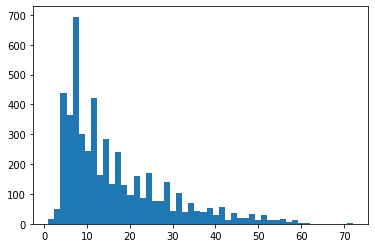

In [30]:
import matplotlib.pyplot as plt
plt.hist(hist_len, bins=50)

In [31]:
sum(hist_len) / len(x_train_small)

16.5836

In [32]:
x_train_small = tf.keras.preprocessing.sequence.pad_sequences(x_train_small, maxlen=50)

In [33]:
y_train_small = y_train[0:5000]

In [34]:
# y_train_small[6] = 3

In [35]:
# y_train_small[6]

In [48]:
y_train_small = np.array(y_train_small)-1

In [49]:
import numpy as np
np.unique(y_train_small)

array([0, 1, 3, 4])

In [37]:
len(x_train_small), len(y_train_small)

(5000, 5000)

In [38]:
# y_train_onehot = tf.keras.utils.to_categorical(y_train_small)
# len(y_train_onehot[5])

In [39]:
# len(y_train_onehot[5]), y_train_onehot[5]

#make model

In [50]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=30, input_length=50)) # input layer
model.add(tf.keras.layers.LSTM(128)) # hidden layer
# model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128))) # hidden layer
# model.add(tf.keras.layers.GRU(128)) # hidden layer

model.add(tf.keras.layers.Dense(5, activation='softmax')) # output layer

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc']) # gadget

In [ ]:
hist = model.fit(x_train_small, y_train_small, epochs=50, batch_size=256, validation_split=0.3, shuffle=True)

In [52]:
# model.evaluate(x_train_small, y_train_small) # LSTM(128) - loss: 0.9170 - acc: 0.8500

157/157 [==============================] - 3s 17ms/step - loss: 0.9170 - acc: 0.8500


[0.917026937007904, 0.8500000238418579]

In [42]:
# model.evaluate(x_train_small, y_train_small) # GRU - loss: 0.9265 - acc: 0.8436

157/157 [==============================] - 3s 18ms/step - loss: 0.9265 - acc: 0.8436


[0.9265221953392029, 0.8435999751091003]

In [46]:
# model.evaluate(x_train_small, y_train_small) # Bidirectional(LSTM(128)) - loss: 0.8787 - acc: 0.8382

157/157 [==============================] - 3s 22ms/step - loss: 0.8787 - acc: 0.8382


[0.8787214756011963, 0.8381999731063843]